Network updates are done:

META CRAN is used to generate the dependency network instead of library.io data. Excluded optional dependency like linkingto, suggests and so on.

Added publisher based network for NPM ember-eco.

The newest summary dataset is in /da4_data/play/newestRCRANNPMEmber.data
Rename ember.publisher.network.summary to E_pb


In [27]:
pcran=scan('pcran', what="")
pember=scan('pember', what="")

Cdep = data.frame(name=pcran)
for (n in c("CD_up", "CD_dn", "CR_up", "CR_dn", 'C_au','C_mn', 
            "CR_up.old", "CR_dn.old", "CD_up.old", "CD_dn.old")){
  x = read.csv(n,header = FALSE,sep = ';')
  x = x[!is.na(match(x[,1],pcran)),]
  Cdep[,paste(n, '', sep='')] = rep(0, length(pcran));
  sel = match(pcran, x[,1],nomatch=0);
  Cdep[sel>0,paste(n, '', sep='')] =  x[sel,2];
} 
summary(Cdep)

Edep = data.frame(name=pember)
for (n in c("ED_up_I", "ED_dn_I", "ER_up_I", "ER_dn_I",
            "ED_up_O", "ED_dn_O", "ER_up_O", "ER_dn_O", 
            'E_au','E_mn', 'E_pb')){
  x = read.csv(n,header = FALSE,sep = ';')
   x = x[!is.na(match(x[,1],pember)),]
  Edep[,paste(n, '', sep='')] = rep(0, length(pember));
  sel = match(pember, x[,1],nomatch=0);
  Edep[sel>0,paste(n, '', sep='')] =  x [sel,2];
} 

Edep$ED_up = Edep[,c("ED_up_I")]+Edep[,c("ED_up_O")]
Edep$ED_dn = Edep[,c("ED_dn_I")]+Edep[,c("ED_dn_O")]
Edep$ER_up = Edep[,c("ER_up_I")]+Edep[,c("ER_up_O")]
Edep$ER_dn = Edep[,c("ER_dn_I")]+Edep[,c("ER_dn_O")]

summary(Edep)

          name           CD_up            CD_dn              CR_up      
 A3         :    1   Min.   : 0.000   Min.   :   0.000   Min.   :  0.0  
 ABC.RAP    :    1   1st Qu.: 1.000   1st Qu.:   0.000   1st Qu.:  2.0  
 ABCExtremes:    1   Median : 3.000   Median :   0.000   Median :  9.0  
 ABCanalysis:    1   Mean   : 4.009   Mean   :   2.804   Mean   : 15.5  
 ABCoptim   :    1   3rd Qu.: 6.000   3rd Qu.:   0.000   3rd Qu.: 20.0  
 ABCp2      :    1   Max.   :37.000   Max.   :1118.000   Max.   :141.0  
 (Other)    :11062                                                      
     CR_dn              C_au              C_mn          CR_up.old     
 Min.   :   0.00   Min.   :  0.000   Min.   : 0.000   Min.   :  0.00  
 1st Qu.:   0.00   1st Qu.:  0.000   1st Qu.: 0.000   1st Qu.:  1.00  
 Median :   0.00   Median :  2.000   Median : 1.000   Median :  6.00  
 Mean   :  11.92   Mean   :  8.949   Mean   : 3.824   Mean   : 17.79  
 3rd Qu.:   0.00   3rd Qu.:  7.000   3rd Qu.: 3.000   3rd Qu.

                       name         ED_up_I          ED_dn_I        
 @abcum/ember-appupdate  :   1   Min.   : 0.000   Min.   :   0.000  
 @abcum/ember-contextmenu:   1   1st Qu.: 0.000   1st Qu.:   0.000  
 @abcum/ember-domain     :   1   Median : 1.000   Median :   0.000  
 @abcum/ember-editables  :   1   Mean   : 1.402   Mean   :   1.851  
 @abcum/ember-gridlist   :   1   3rd Qu.: 2.000   3rd Qu.:   0.000  
 @abcum/ember-helpers    :   1   Max.   :16.000   Max.   :3109.000  
 (Other)                 :3381                                      
    ER_up_I         ER_dn_I            ED_up_O         ED_dn_O        
 Min.   : 0.00   Min.   :   0.000   Min.   : 0.00   Min.   :  0.0000  
 1st Qu.: 0.00   1st Qu.:   0.000   1st Qu.: 0.00   1st Qu.:  0.0000  
 Median : 4.00   Median :   0.000   Median : 0.00   Median :  0.0000  
 Mean   : 3.89   Mean   :   5.207   Mean   : 1.21   Mean   :  0.4009  
 3rd Qu.: 5.00   3rd Qu.:   0.000   3rd Qu.: 1.00   3rd Qu.:  0.0000  
 Max.   :36.00   Max. 

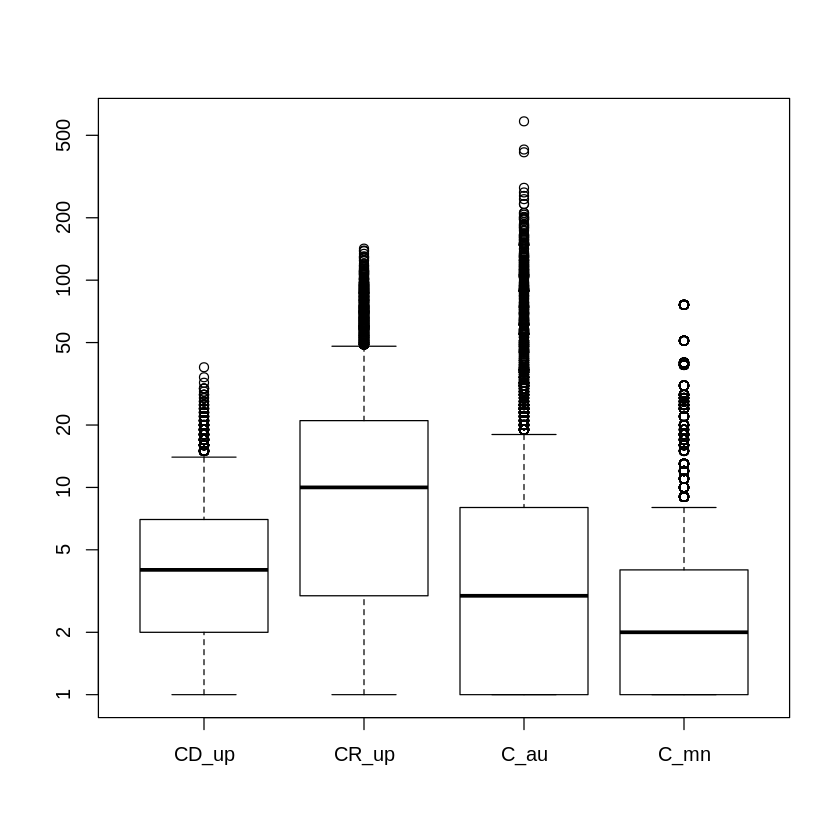

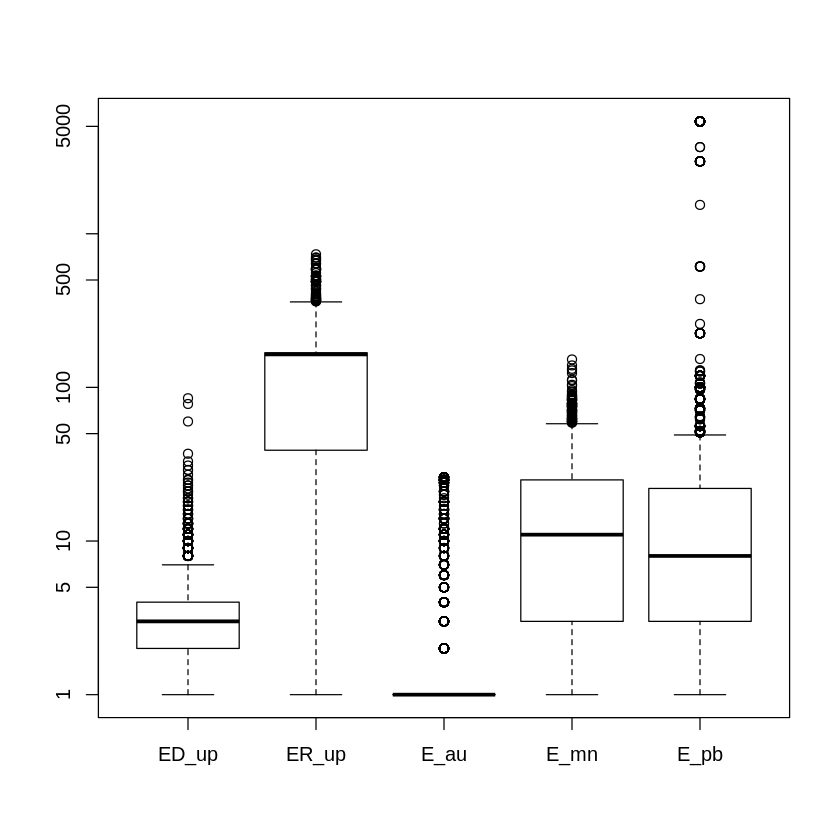

In [28]:

boxplot(Cdep[,c("CD_up","CR_up","C_au","C_mn")]+1,log="y")
boxplot(Edep[,c("ED_up","ER_up","E_au","E_mn","E_pb")]+1,log="y")



CRAN has a median of three direct and 9 recursive upstream dependencies, while ember has two direct and 163 (recursive) upstream dependencies. Huge difference in recursive dependencies.

Publisher network is similar to that of maintainer in ember. Both are larger than author/mntnr networks in CRAN.
The maintainer network links a median of nine other ember packages but only one in CRAN.

Author network links to a median of two packages in CRAN, but to zero in ember, but thats the issue of how authors are defined in CRAN and ember.

The concept of author and maintainer is reversed in ember (and npm): author is typically the single 
person responsible for a package (aka maintainer in CRAN), while maintainers could be several. 
The actual set of contributors (found in git) is much larger in both CRAN and ember.

NPMS maintainer is (the same as npm maintainer) but does not include the full list of contributors (aka AUTHORS in CRAN)

In [30]:
#what is the probability of at least one downstream dep?
round(c(mean(Edep[,"E_mn"]>0),
        mean(Cdep[,"C_au"]>0), 
        mean(Cdep[,"CD_dn"]>0), 
        mean(Cdep[,"CR_dn"]>0),
        mean(Edep[,"ED_dn_I"]>0),
        mean(Edep[,"ED_dn_O"]>0),
        mean(Edep[,"ED_dn"]>0),
        mean(Edep[,"ER_up"]>100),
        mean(Cdep[,"CR_up"]>100)
),3)

[1] 0.880 0.725 0.248 0.248 0.110 0.052 0.124 0.712 0.004

Author-induced in ember and downstream dependendency induced networks in both ecosystems are rare: 
only 25% of packages in CRAN and 12% in ember have any dependents. 

This means that for the purpose of studying how to structure information flows, only 25% of the packages in 
CRAN and 12% in ember could potentially break downstream (though all may affect end users or packages outside CRAN).

In CRAN this fraction is much higher, hence it has to be reflected in different coordination practices.

Maintainers (similar to CRAN authors) provide at least one link in only 88% of ember packages, but 
the CRAN authors provideing a link in 73% of packages.

This either indicates similar collaboration structure.


In [31]:
t.test(log(Cdep[,"CD_up"]+1), log(Edep[,"ED_up"]+1))
t.test(log(Cdep[,"CR_up"]+1), log(Edep[,"ER_up"]+1))


	Welch Two Sample t-test

data:  log(Cdep[, "CD_up"] + 1) and log(Edep[, "ED_up"] + 1)
t = 22.651, df = 6158.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2860970 0.3403109
sample estimates:
mean of x mean of y 
 1.337345  1.024141 



	Welch Two Sample t-test

data:  log(Cdep[, "CR_up"] + 1) and log(Edep[, "ER_up"] + 1)
t = -51.002, df = 4206.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.981495 -1.834796
sample estimates:
mean of x mean of y 
 2.111594  4.019739 


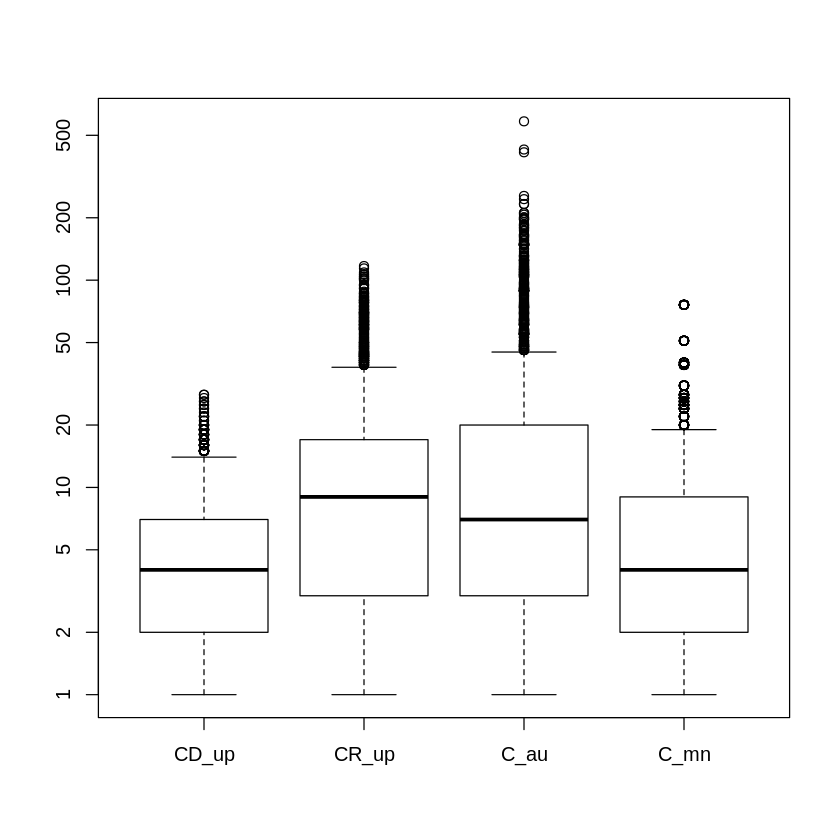

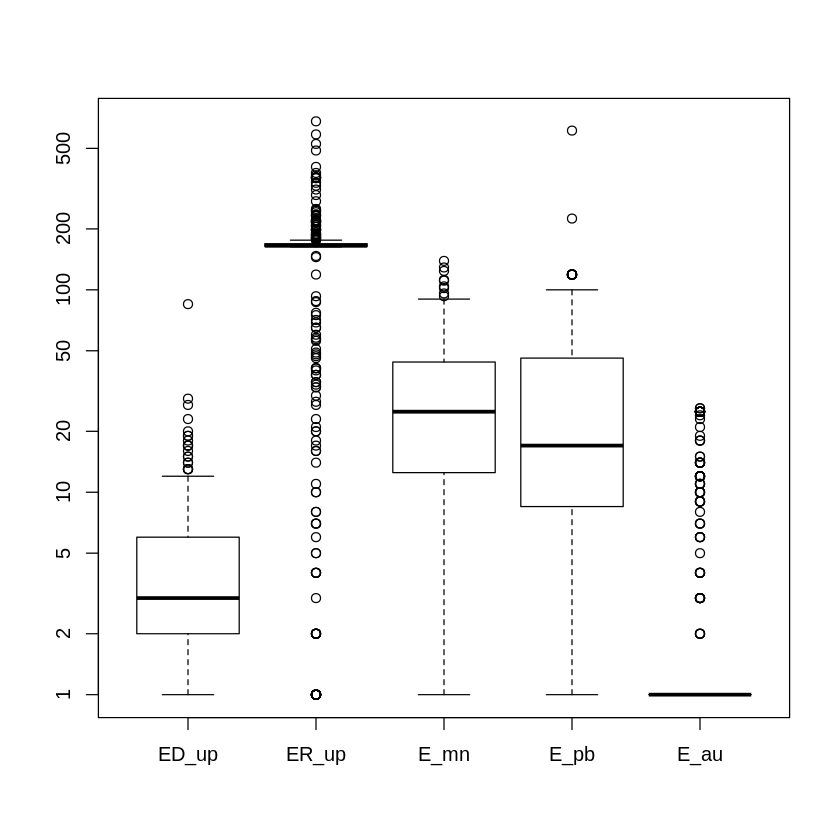

In [32]:
#lets look at "nontrivial" packages with at least one downstream dep
boxplot(Cdep[Cdep[,"CD_dn"]>0,c("CD_up","CR_up","C_au","C_mn")]+1,log="y")
boxplot(Edep[Edep[,"ED_dn"]>0,c("ED_up","ER_up","E_mn","E_pb","E_au")]+1,log="y")


### The important (with dependents) packages in ember have similar upstream dependencies to all packages (2->2D, 180-180R) but in CRAN they have more (3->3D and 9-9R)

The author- and maintainer-induced networks increas CRAN (author: 2->6 and maintainer: 1->3). 

For Ember, the maintainer network also becomes much denser (10->30)

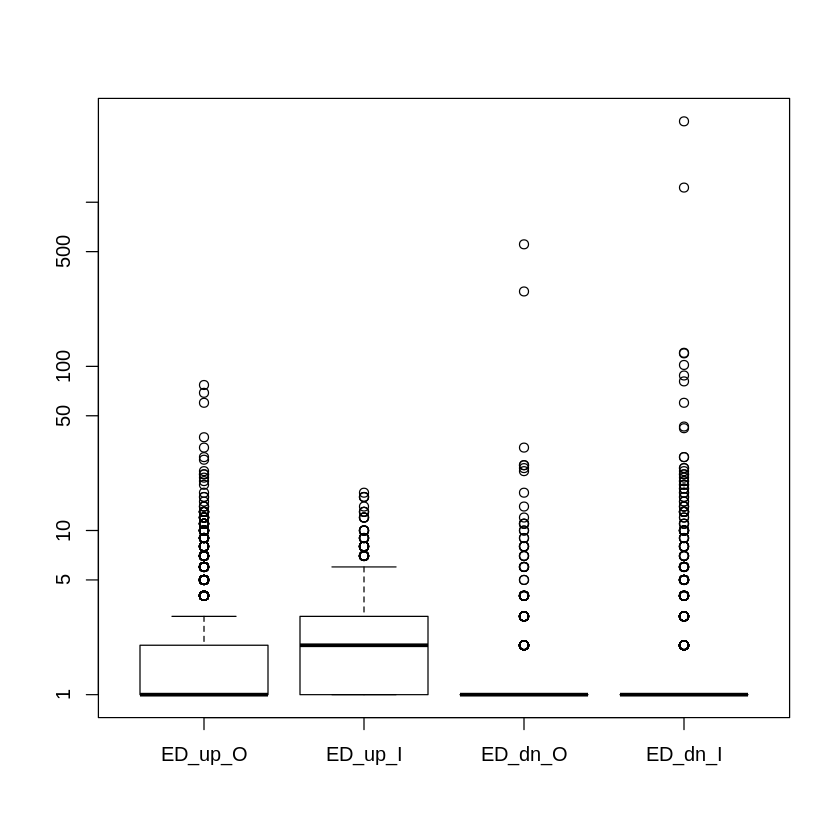

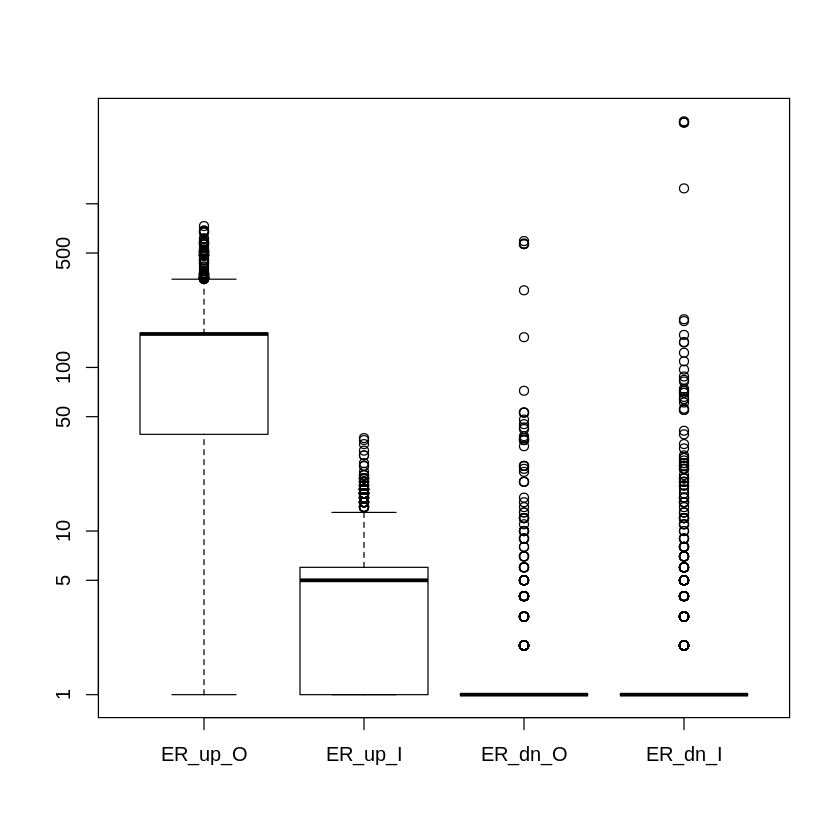

In [33]:
#investigating ember's internal vs external dependencies
boxplot(Edep[,c("ED_up_O","ED_up_I",
                "ED_dn_O","ED_dn_I")]+1,        
        log='y')
boxplot(Edep[,c("ER_up_O","ER_up_I",
                "ER_dn_O","ER_dn_I")]+1,        
        log='y')


The internal recursive upstream dependencies are limited by the 4.5K total packages in ember, and the 
external recursive upstream dependencies are, therefore almost two orders of magnitude higher.

The direct internal upstream dependencies are a bit more common than external (median of 1 vs 0), however, 
so it may be possible to estimate the ecosystem boundaries via suitable clustering. 

In [35]:
rpcran=scan('rpcran', what="")
rpember=scan('rpember', what="")

Cdepr = data.frame(name=rpcran)
for (n in c("C_RP_cro", "C_RP_IN")){
  x = read.csv(n,header = FALSE,sep = ';')
  x = x[!is.na(match(x[,1],rpcran)),]
  Cdepr[,paste(n, '', sep='')] = rep(0, length(rpcran));
  sel = match(rpcran, x[,1],nomatch=0);
  Cdepr[sel>0,paste(n, '', sep='')] =  x[sel,2];
} 
summary(Cdepr)

Edepr = data.frame(name=rpember)
for (n in c("E_RP_cro", "E_RP_IN")){
  x = read.csv(n,header = FALSE,sep = ';')
   x = x[!is.na(match(x[,1],rpember)),]
  Edepr[,paste(n, '', sep='')] = rep(0, length(rpember));
  sel = match(rpember, x[,1],nomatch=0);
  Edepr[sel>0,paste(n, '', sep='')] =  x [sel,2];
} 
summary(Edepr)

                          name         C_RP_cro          C_RP_IN     
 942kid_plac.git            :   1   Min.   :    0.0   Min.   :  0.0  
 AEBilgrau_GMCM.git         :   1   1st Qu.:    3.0   1st Qu.:  1.0  
 AFIT-R_KraljicMatrix.git   :   1   Median :   25.0   Median :  7.0  
 AFIT-R_anomalyDetection.git:   1   Mean   : 1203.3   Mean   : 30.9  
 AFIT-R_sure.git            :   1   3rd Qu.:  322.2   3rd Qu.: 38.0  
 AIBRT_FreqProf.git         :   1   Max.   :87078.0   Max.   :691.0  
 (Other)                    :2202                                    

                                                name         E_RP_cro     
 12StarsMedia_ember-ui-sortable.git               :   1   Min.   :     0  
 201-created_ember-cli-acceptance-test-helpers.git:   1   1st Qu.:  1014  
 201-created_ember-cli-airbrake.git               :   1   Median :  7417  
 201-created_ember-cli-fake-server.git            :   1   Mean   :  9366  
 201-created_ember-data-hal-9000.git              :   1   3rd Qu.:  7981  
 201-created_ember-test-helpers-addon.git         :   1   Max.   :595674  
 (Other)                                          :3097                   
    E_RP_IN    
 Min.   :   0  
 1st Qu.: 199  
 Median :2004  
 Mean   :1359  
 3rd Qu.:2025  
 Max.   :2540  
               

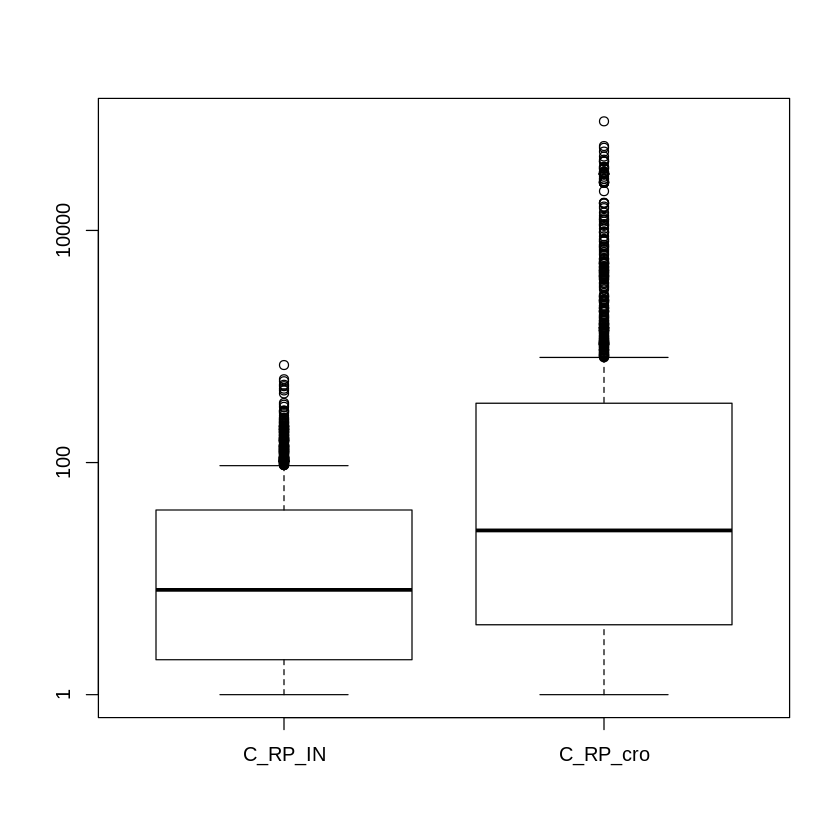

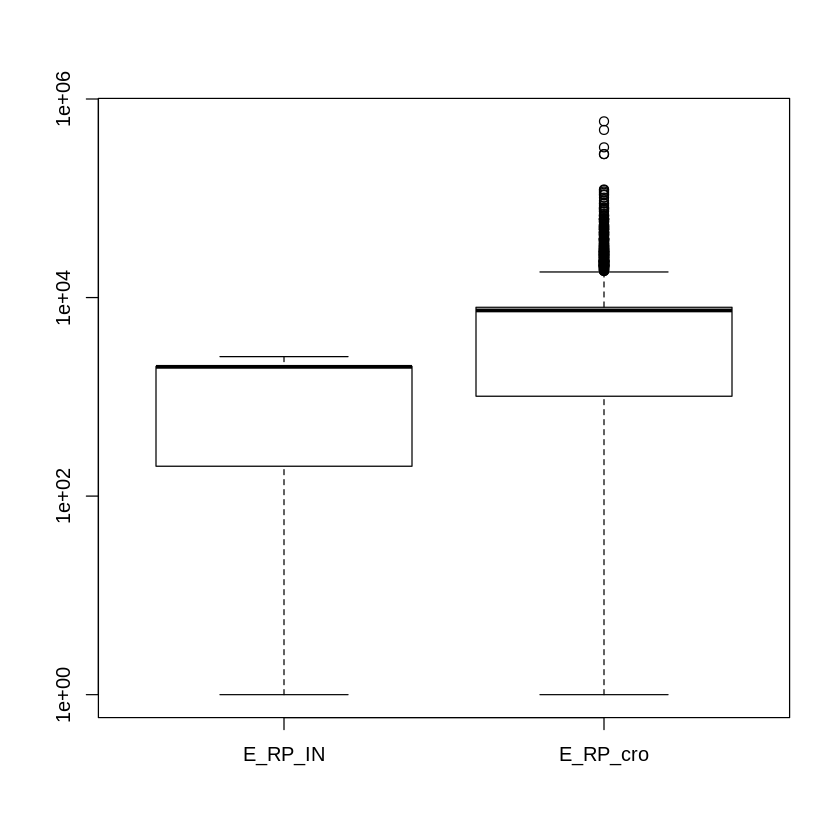

In [36]:
boxplot(Cdepr[,c("C_RP_IN","C_RP_cro")]+1,log="y")
boxplot(Edepr[,c("E_RP_IN","E_RP_cro")]+1,log="y")
